In [32]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import matplotlib.pyplot as plt

### Scrape the data

In [ ]:
result_page_link = 'https://lookerstudio.google.com/u/0/reporting/8a499258-1e5c-427c-810b-dce0fa1a2e03/page/KCCDE'
id_list_link = 'https://cfl.hcmus.edu.vn/vi/thong-bao-nhan-giay-bao-du-thi-ky-thi-dgnl-tieng-anh-ngay-thi-08-09-2024'

def get_all_id():
    driver = webdriver.Chrome()
    driver.get(id_list_link)

    id_list = []
    table = driver.find_element(By.CSS_SELECTOR, 'table')
    rows = table.find_elements(By.CSS_SELECTOR, 'tr')
    for row in rows[1:]:
        columns = row.find_elements(By.CSS_SELECTOR, 'td')
        id = columns[1].text
        id_list.append(id)

    return id_list
    
def get_all_score(ids):
    driver = webdriver.Chrome()
    driver.get(result_page_link)

    results = []
    for id in ids:
        result = get_score_by_id(id, driver)
        print(result)
        results.append(result)

    return results

def get_score_by_id(id, driver):
    try:        
        driver.refresh()
        # Wait and submit the ID
        wait = WebDriverWait(driver, 10)
        mssv_button = wait.until(EC.presence_of_element_located((By.ID, 'input_1')))
        mssv_button.clear()
        mssv_button.send_keys(id)
        mssv_button.send_keys(Keys.ENTER)

        # Get the student name
        driver.switch_to.default_content()
        iframe = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'iframe[component-id="cd-ez0xqukfld"]')))
        driver.switch_to.frame(iframe)
        iframe = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'iframe[id="viz-loader"]')))
        driver.switch_to.frame(iframe)

        student_name = wait.until(EC.presence_of_element_located((By.XPATH, '//h2[contains(text(), "Họ tên")]/span'))).text

        # Get the score
        driver.switch_to.default_content()
        iframe = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'iframe[component-id="cd-vvadb6kfld"]')))
        driver.switch_to.frame(iframe)
        iframe = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'iframe[id="viz-loader"]')))
        driver.switch_to.frame(iframe)

        score_board = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, '.mdc-card-content')))

        listening = score_board.find_element(By.XPATH, '//h2[contains(text(), "Nghe")]/span').text
        speaking = score_board.find_element(By.XPATH, '//h2[contains(text(), "Nói")]/span').text
        reading = score_board.find_element(By.XPATH, '//h2[contains(text(), "Đọc")]/span').text
        writing = score_board.find_element(By.XPATH, '//h2[contains(text(), "Viết")]/span').text
        total = score_board.find_element(By.XPATH, '//h2[contains(text(), "Tổng")]/span').text

        return [student_name, listening, speaking, reading, writing, total]

    except Exception as e:
        print(f"Error: {e}")
        return None

data = get_all_score(get_all_id())


### Analyze the data

In [41]:
# Create the dataframe

# Replace 'V' with 0
modified_data = [[0 if item == 'V' else item for item in row] for row in data if type(row) == list]

columns_name = ['Name', 'Listening', 'Speaking', 'Reading', 'Writing', 'Total']
score_df = pd.DataFrame(modified_data, columns=columns_name)
score_df[['Listening', 'Speaking', 'Reading', 'Writing', 'Total']] = score_df[['Listening', 'Speaking', 'Reading', 'Writing', 'Total']].astype(int)
score_df

,Name,Listening,Speaking,Reading,Writing,Total
0,Trần Tiến Đạt,36,32,30,25,123
1,Võ Thị Thu Hồng,22,21,11,11,65
2,Lê Đăng Phan Huy,0,0,0,0,0
3,Thân Trọng Anh Khoa,40,31,25,32,128
4,Nguyễn Thanh Kiên,34,28,21,25,108
...,...,...,...,...,...,...
143,Phạm Thị Nhị,32,29,32,26,119
144,Trần Tấn Phát,40,30,31,24,125
145,Nguyễn Trí Thức,26,13,12,14,65
146,Trần Phước Thạnh,0,0,0,0,0


In [38]:
top_7_listening = score_df.sort_values(by=['Listening', 'Total'], ascending=[False, False]).head(7)[['Name', 'Listening', 'Total']]
top_7_speaking = score_df.sort_values(by=['Speaking', 'Total'], ascending=[False, False]).head(7)[['Name', 'Speaking', 'Total']]
top_7_reading = score_df.sort_values(by=['Reading', 'Total'], ascending=[False, False]).head(7)[['Name', 'Reading', 'Total']]
top_7_writing = score_df.sort_values(by=['Writing', 'Total'], ascending=[False, False]).head(7)[['Name', 'Writing', 'Total']]
top_7_total = score_df.sort_values(by='Total', ascending=False).head(7)
# Print results
print("Top 7 students in Listening:\n", top_7_listening)
print("\nTop 7 students in Speaking:\n", top_7_speaking)
print("\nTop 7 students in Reading:\n", top_7_reading)
print("\nTop 7 students in Writing:\n", top_7_writing)
print("\nTop 7 students in Total score:\n", top_7_total)


Top 7 students in Listening:
                       Name  Listening Total
45    Đào Ngọc Thảo Nguyên         40   143
38       Trịnh Hoàng Khang         40   141
95       Nguyễn Quang Vinh         40   140
79       Trần Nghiêm Thành         40   139
134    Nguyễn Ngọc Gia Huy         40   139
39        Nguyễn Nam Khánh         40   136
16   Nguyễn Ngọc Tuyết Nhi         40   131

Top 7 students in Speaking:
                      Name  Speaking Total
104        Nguyễn Anh Thư        37   127
45   Đào Ngọc Thảo Nguyên        36   143
49           Ma Thanh Nhi        36   125
120  Nguyễn Vũ Nhật Thành        36   117
36       Nguyễn Thị Huyền        35   132
27         Phạm Khánh Hân        35   129
91       Nguyễn Cao Thắng        35   110

Top 7 students in Reading:
                       Name  Reading Total
38       Trịnh Hoàng Khang       37   141
45    Đào Ngọc Thảo Nguyên       36   143
95       Nguyễn Quang Vinh       36   140
134    Nguyễn Ngọc Gia Huy       35   139
48       Nguy

In [39]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       148 non-null    object
 1   Listening  148 non-null    int32 
 2   Speaking   148 non-null    int32 
 3   Reading    148 non-null    int32 
 4   Writing    148 non-null    int32 
 5   Total      148 non-null    object
dtypes: int32(4), object(2)
memory usage: 4.8+ KB


In [42]:
avarage_listening = score_df['Listening'].mean()
avarage_speaking = score_df['Speaking'].mean()
avarage_reading = score_df['Reading'].mean()
avarage_writing = score_df['Writing'].mean()
avarage_total = score_df['Total'].mean()
print(f'{avarage_listening:.2f}')
print(f'{avarage_speaking:.2f}')
print(f'{avarage_reading:.2f}')
print(f'{avarage_writing:.2f}')
print(f'{avarage_total:.2f}')

27.74
24.24
21.05
20.70
93.74


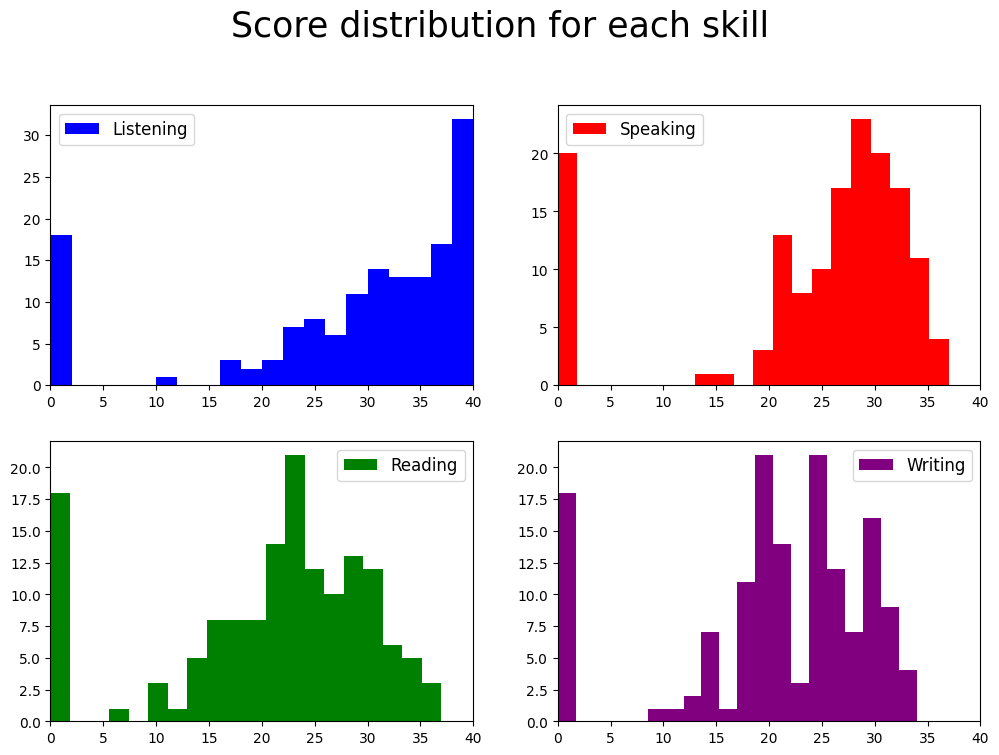

In [43]:
plt.figure(figsize=(12, 8))
plt.suptitle("Score distribution for each skill", fontsize=25, y=1)

plt.subplot(2, 2, 1)
plt.hist(score_df['Listening'], bins=20, color='blue', label='Listening')
plt.legend(fontsize='large') 
plt.xlim(0, 40)

plt.subplot(2, 2, 2)
plt.hist(score_df['Speaking'], bins=20, color='red', label='Speaking')
plt.xlim(0, 40)
plt.legend(fontsize='large')

plt.subplot(2, 2, 3)
plt.hist(score_df['Reading'], bins=20, color='green', label='Reading')
plt.xlim(0, 40)
plt.legend(fontsize='large')

plt.subplot(2, 2, 4)
plt.hist(score_df['Writing'], bins=20, color='purple', label='Writing')
plt.xlim(0, 40)
plt.legend(fontsize='large')

# plt.savefig('Score distribution 4 skills.png', dpi=300, bbox_inches='tight')

(0.0, 160.0)

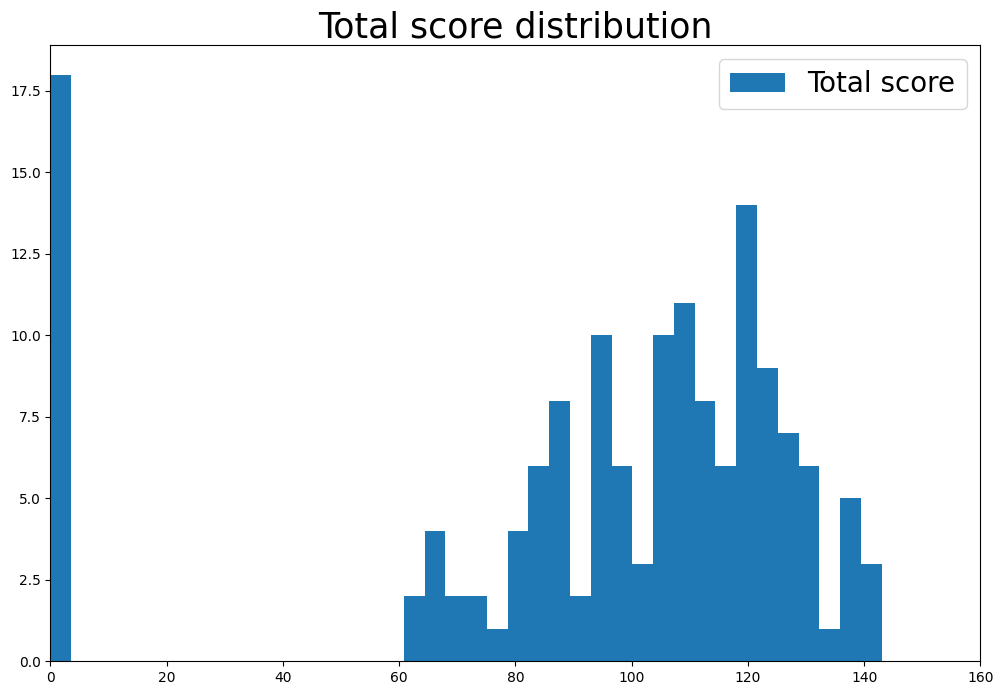

In [44]:
plt.figure(figsize=(12, 8))
plt.title('Total score distribution', fontsize=25, y=1)
plt.hist(score_df['Total'], bins=40, label='Total score')
plt.legend(fontsize=20)
plt.xlim([0, 160])
# plt.savefig('Total score distribution.png', dpi=300, bbox_inches='tight')